# The Havoc Paradox: Notebook for Generating All Tables and Figures

## Imports and Data Loading

First, we'll need to import the proper libraries and load the aggregated data to generate the tables/figures. This will load all mutation distance data and filter the inputs to those with nonzero length. We will also load the coverage and execution speed data for the longer 24 hour experiments. 

In [1]:
import seaborn as sns
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

from mutation_distance_plots import *

# Define a color palette
palette = sns.color_palette("husl", 6)  # "husl" generates distinct colors

colors = {"Zest": palette[0], "BeDivFuzz": palette[1], "EI": palette[2], "Zeugma": palette[3], "Random": palette[4], "Zest-Mini": palette[5]}

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

mutation_df = pd.read_csv("../data/mutation_distances.csv")
mutation_df = mutation_df.dropna()
all_input_df = mutation_df[~mutation_df['algorithm'].str.contains('saved')]
all_input_df_nonzero_len = all_input_df[(all_input_df['parent_len'] != 0) & (all_input_df['current_len'] != 0)]

<!-- # Mutation Distance (Bytes) -->

## RQ1: Mutation Distances

### Figure 8: Mutation Distances for Google Closure

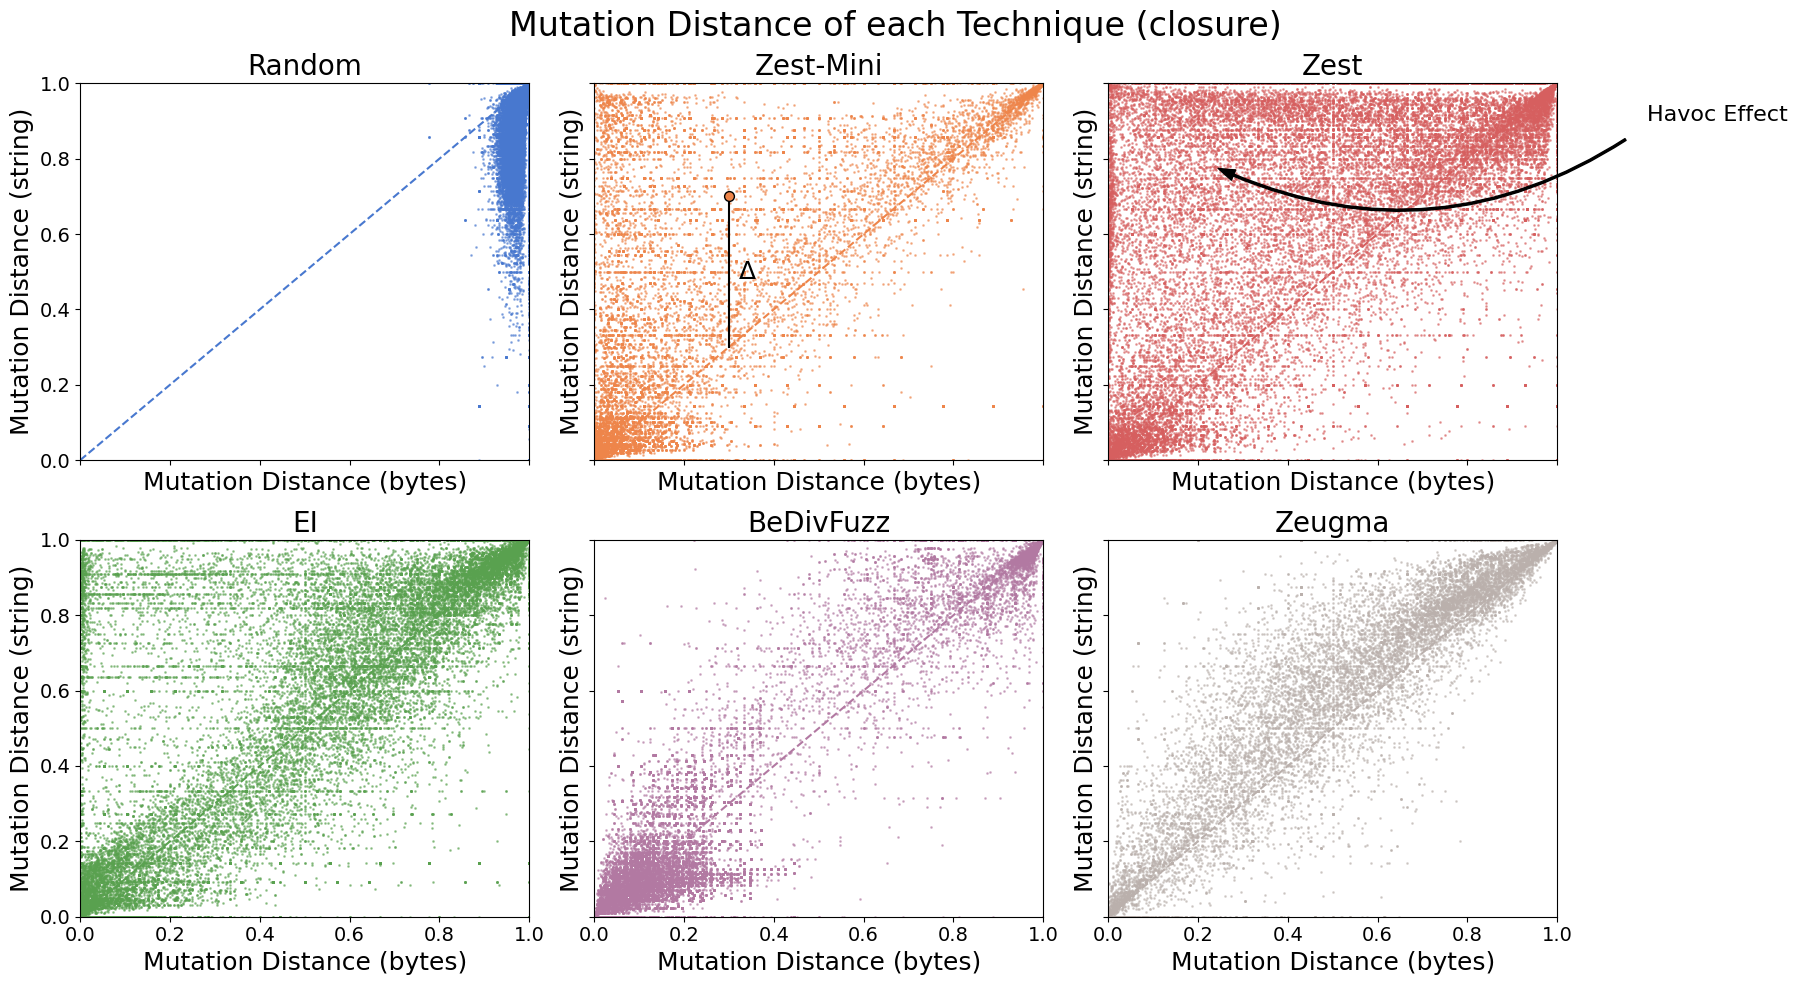

In [2]:
# Generate the plot
fig = plot_mut_distance_scatter(all_input_df_nonzero_len, "closure", True)
plt.savefig("figs/scatter/mutation_distance_scatter_closure.png", dpi=300, bbox_inches='tight')

### Figure 9: Heatmap of Normalized Mutation Distance for all Techniques/Benchmarks

/usr0/home/vvikram/Work/havoc-mutation-eval/notebooks/mutation_distance_plots.py:164: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_array = annot_array.applymap(format_cell)


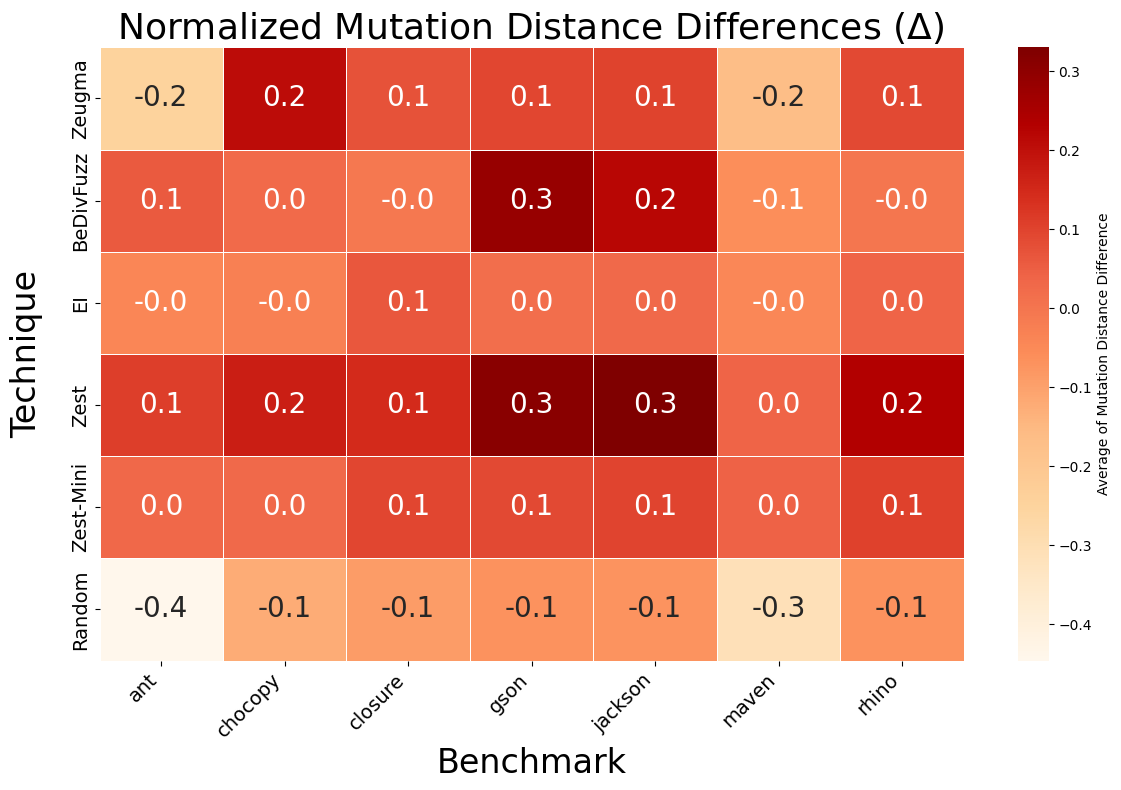

In [3]:
fig = plot_mutation_dist_heatmap(all_input_df_nonzero_len)
plt.savefig("figs/havoc_mutation_distance_heatmap.pdf", bbox_inches='tight')

### Figure 10: Zero Mutation Rate

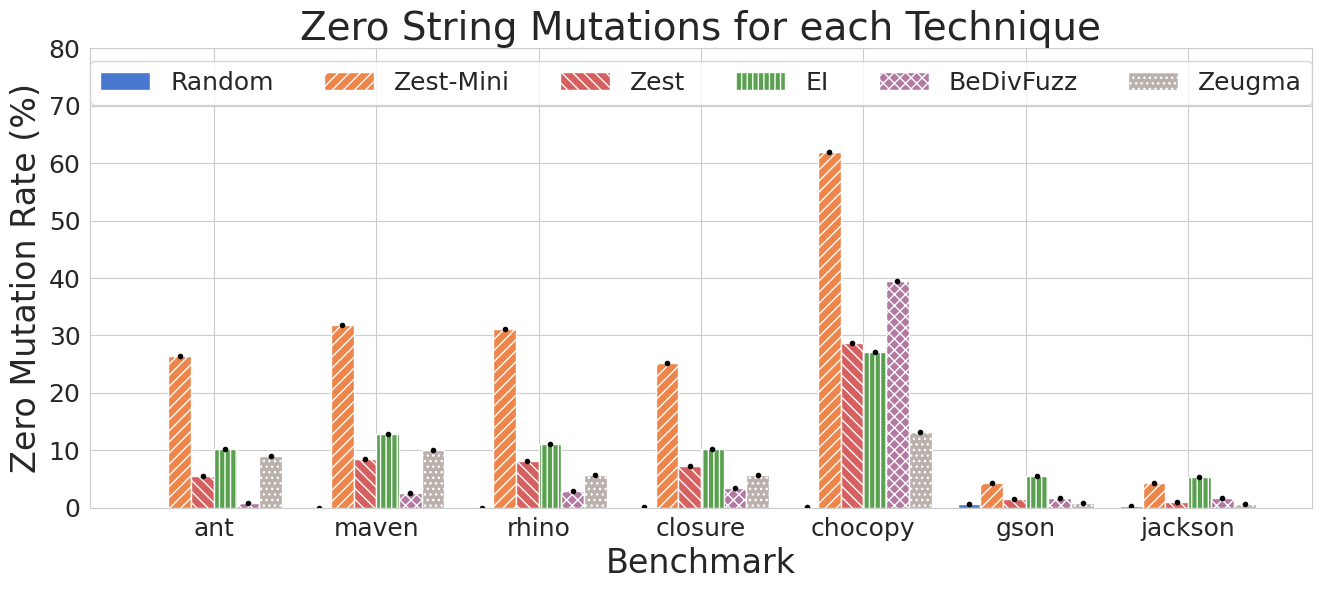

In [4]:
plt, zero_mutation_data = create_zero_mutation_plot(all_input_df_nonzero_len)
plt.savefig("figs/zero_mutations.pdf", bbox_inches='tight')

## RQ2: Validity-Preserving Mutations

### Figure 11: Validity-Preserving Mutation Rate across all Techniques/Benchmarks

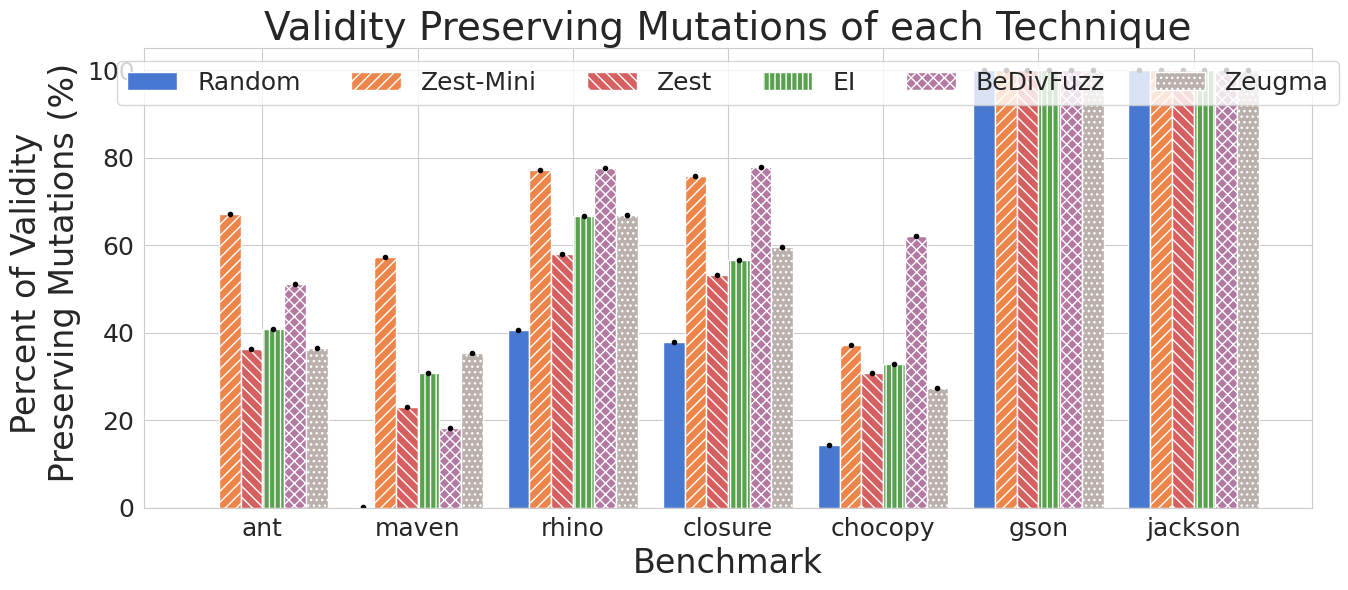

In [5]:
plt, success_data = create_success_rate_chart(all_input_df_nonzero_len)
plt.savefig("figs/mutation_validity.pdf", bbox_inches='tight')

## RQ3: Code Coverage

### Figure 12: Saved Input Mutation Distance Ratio

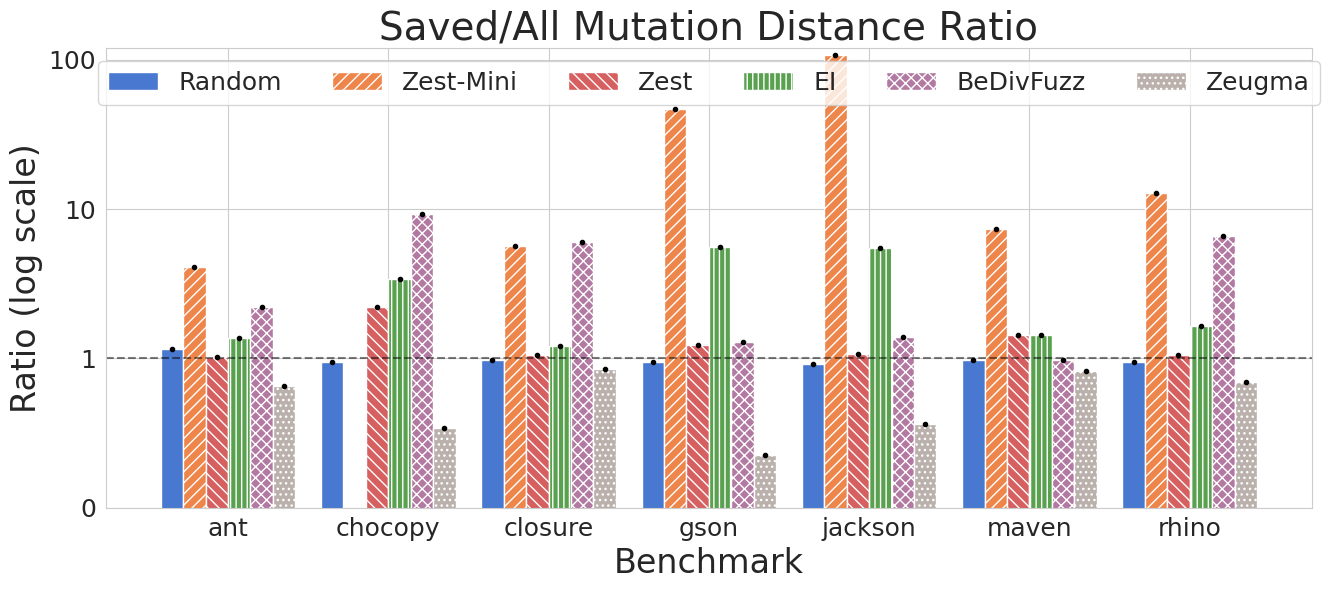

In [6]:
create_saved_all_ratio_plot(all_input_df_nonzero_len, "figs/mutation_distance_ratio.pdf")